# Лабораторная Сплайн Макарова

In [50]:
import numpy as np
import decimal
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from sympy import diff, symbols, cos, sin, exp , ln, sqrt
from sympy import *
x, y = symbols('x y')

In [221]:
b1=[0]*9
b2=[0]*8
b3=[0]*7
b4=[0]*6
b5=[0]*5
b6=[0]*4
b7=[0]*3
b8=[0]*2
b9=[0]
a=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
b=[92228496, 106021537,123202624,132164569,151325798,179323175,203211926,226545805,248709873,281421906]
res=[281421906,0,0,0,0,0,0,0,0,0]


Рассчитаю разделенные разности:

In [222]:
for i in range(9):
    b1[i] = (b[i+1]-b[i])/(a[i+1]-a[i])
    print(b1[i])
res[1] = b1[8]   

1379304.1
1718108.7
896194.5
1916122.9
2799737.7
2388875.1
2333387.9
2216406.8
3271203.3


In [223]:
for i in range(8):
    b2[i] = (b1[i+1]-b1[i])/(a[i+2]-a[i])
    print(b2[i])
    
res[2] = b2[7] 

16940.229999999992
-41095.71
50996.42
44180.74000000001
-20543.130000000005
-2774.360000000009
-5849.055000000005
52739.825


In [224]:
for i in range(7):
    b3[i] = (b2[i+1]-b2[i])/(a[i+3]-a[i])
    print(b3[i])
res[3] = b3[6]    

-1934.531333333333
3069.737666666667
-227.18933333333285
-2157.462333333334
592.2923333333332
-102.48983333333318
1952.9626666666668


In [225]:
for i in range(6):
    b4[i] = (b3[i+1]-b3[i])/(a[i+4]-a[i])
    print(format(b4[i], '.5f'))
res[4] = b4[5]  

125.10673
-82.42317
-48.25683
68.74387
-17.36955
51.38631


In [226]:
for i in range(5):
    b5[i] = (b4[i+1]-b4[i])/(a[i+5]-a[i])
    print(format(b5[i], '.5f'))
res[5] = b5[4]  


-4.15060
0.68333
2.34001
-1.72227
1.37512


In [227]:
for i in range(4):
    b6[i] = (b5[i+1]-b5[i])/(a[i+6]-a[i])
    print(format(b6[i], '.5f'))
res[6] = b6[3]  

0.08057
0.02761
-0.06770
0.05162


In [228]:
for i in range(3):
    b7[i] = (b6[i+1]-b6[i])/(a[i+7]-a[i])
    print(format(b7[i], '.5f'))
res[7] = b7[2]  

-0.00076
-0.00136
0.00170


In [229]:
for i in range(2):
    b8[i] = (b7[i+1]-b7[i])/(a[i+8]-a[i])
    print(format(b8[i], '.5f'))
res[8] = b8[1]  

-0.00001
0.00004


In [230]:
for i in range(1):
    b9[i] = (b8[i+1]-b8[i])/(a[i+9]-a[i])
    print(format(b9[i], '.5f'))
res[9] = b9[0]  

0.00000


Выпишу коэффициенты для построения полинома Ньютона:

In [231]:
res

[281421906,
 3271203.3,
 52739.825,
 1952.9626666666668,
 51.386312499999995,
 1.3751173333333333,
 0.051623095833333334,
 0.0017046828571428572,
 3.832927703373017e-05,
 5.099328042328045e-07]

In [209]:
#Полином Ньютона
def ff(x):
    return(res[0] + res[1]*(x-a[9]) + res[2]*(x-a[9])*(x-a[8])+ res[3]*(x-a[9])*(x-a[8])*(x-a[7])+res[4]*(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6]) + res[5]*(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6])*(x-a[5]) + res[6]*(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6])*(x-a[5])*(x-a[4]) + res[7]*(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6])*(x-a[5])*(x-a[4])*(x-a[3])+ res[8]*(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6])*(x-a[5])*(x-a[4])*(x-a[3])*(x-a[2]) + res[9] *(x-a[9])*(x-a[8])*(x-a[7])*(x-a[6])*(x-a[5])*(x-a[4])*(x-a[3])*(x-a[2])*(x-a[1]) )

In [210]:
ff(2010)

827906509.0000001

Вывод: очень плохо соответствует действительности. Попробую построить сплайн.

In [232]:
import numpy as np

In [233]:
A= np.zeros((10, 10))
A[0,0]=1
A [9,9] = 1
for i in range(8):
    A[i+1,i] = 10
    A[i+1,i+1] = 40
    A[i+1,i+2] = 10
A    

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10., 40., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 10., 40., 10.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 40., 10.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 40., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 40., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10., 40., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 10., 40., 10.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 40., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [234]:
B = np.zeros(10)
for i in range(8):
    B[i+1]=3*(b[i+2] - 2 *  b[i+1] + b[i])/10
B

array([       0. ,  1016413.8, -2465742.6,  3059785.2,  2650844.4,
       -1232587.8,  -166461.6,  -350943.3,  3164389.5,        0. ])

In [235]:
C=np.linalg. solve(A, B)

In [236]:
C

array([-2.44472176e-10,  4.92825405e+04, -9.54887821e+04,  8.60983278e+04,
        5.70739910e+04, -4.93098519e+04,  1.69066366e+04, -3.49628544e+04,
        8.78504511e+04,  0.00000000e+00])

In [241]:
a=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
b=[92228496, 106021537,123202624,132164569,151325798,179323175,203211926,226545805,248709873,281421906]
def F(x):  
    i=0
    if ((x>=2000)&(x<2011)):
        i=8
    if (((x<2000)&(x>=1990))):
        i=8
    if (((x<1990)&(x>=1980))):
        i=7
    if (((x<1980)&(x>=1970))):
        i=6
    if (((x<1970)&(x>=1960))):
        i=5        
    if (((x<1960)&(x>=1950))):
        i=4
    if (((x<1950)&(x>=1940))):
        i=3
    if (((x<1940)&(x>=1930))):
        i=2
    if (((x<1930)&(x>=1920))):
        i=1    
    m = ((b[i+1] - b[i])/10 -C[i+1]*(10/3)-C[i]*(20/3))* (x - a[i]) + b [ i] + C[i]* (x - a[i])**2 + (C[i+1]-C[i])/30*(x- a[i])**3  
    return(m)



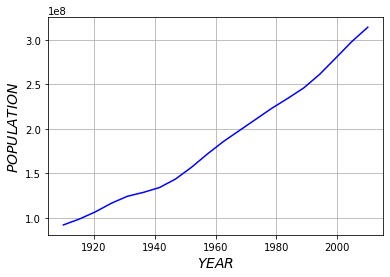

In [242]:

import math
import matplotlib.pyplot as plt

y = np.vectorize(F, otypes=[float])

t = linspace(1910,2010, 20)
plt.xlabel(r'$YEAR$', fontsize=14)
plt.ylabel(r'$POPULATION$', fontsize=14)
plt.grid(True)

plt.plot(t, y(t), 'b') 


plt.show()

Рассчитаем население США к 2010 году:

In [243]:
F(2010)

314133939.0

Вывод : очень неплохо соответствует реальной картине ( статистика нам сообщает о населении в 308745538 человек в 2010 году)

Все :)